In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv(r"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/products_merged_scaler.csv")
df

t√™n ng∆∞·ªùi ƒëƒÉng  gi√° ti·ªÅn (t·ª∑)           ph·ªë/ƒë∆∞·ªùng     ph∆∞·ªùng/th·ªã tr·∫•n  \
0     Nguy·ªÖn Duy Th·∫Øng      -0.694792  Ph·ªë Phan ƒê√¨nh Gi√≥t  Ph∆∞·ªùng Ph∆∞∆°ng Li·ªát   
1              Mr Tran       1.495588      Khu·∫•t Duy Ti·∫øn   Ph∆∞·ªùng Nh√¢n Ch√≠nh   
2          Th√°i Nguy·ªÖn      -1.353845   ƒê∆∞·ªùng Nguy·ªÖn Tr√£i  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh   
3        Ch√≠nh Ch·ªß B√°n      -0.347820   Ph·ªë T√¥n ƒê·ª©c Th·∫Øng     Ph∆∞·ªùng H√†ng B·ªôt   
4      D∆∞∆°ng Th·ªã Chinh       0.739616      Ph·ªë Ch√≠nh Kinh   Ph∆∞·ªùng Nh√¢n Ch√≠nh   
...                ...            ...                 ...                 ...   
9821         Quang C·∫ßn      -0.229579       Ph·ªë Minh Khai    Ph∆∞·ªùng Minh Khai   
9822          Tr·∫ßn Mai       0.235635     ƒê∆∞·ªùng Kim Giang       X√£ Thanh Li·ªát   
9823       Nguy·ªÖn H√πng      -0.093891     ƒê∆∞·ªùng Th·ª•y Khu√™         Ph∆∞·ªùng B∆∞·ªüi   
9824        D∆∞∆°ng Vinh       0.138716       ƒê∆∞·ªùng VƒÉn Cao    Ph∆∞·ªùng Li·ªÖu Giai   
9825         H·ªìng Lu√¢n      -1.452702              Ho·∫° H√†          X√£ B·∫°ch H·∫°   

             qu·∫≠n/huy·ªán th√†nh ph·ªë lo·∫°i h√¨nh cƒÉn h·ªô  di·ªán t√≠ch ƒë·∫•t (m2)  \
0       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi   T·∫≠p Th·ªÉ, C∆∞ X√°            1.113070   
1       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi         Chung C∆∞            2.318840   
2       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi         Chung C∆∞           -0.156161   
3          Qu·∫≠n ƒê·ªëng ƒêa    H√† N·ªôi         Kh√¥ng R√µ           -1.256162   
4       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi         Kh√¥ng R√µ           -0.410007   
...                 ...       ...              ...                 ...   
9821  Qu·∫≠n Hai B√† Tr∆∞ng    H√† N·ªôi         Kh√¥ng R√µ            0.055377   
9822    Huy·ªán Thanh Tr√¨    H√† N·ªôi         Kh√¥ng R√µ           -0.494623   
9823        Qu·∫≠n T√¢y H·ªì    H√† N·ªôi         Kh√¥ng R√µ           -1.002315   
9824       Qu·∫≠n Ba ƒê√¨nh    H√† N·ªôi         Kh√¥ng R√µ           -0.790777   
9825    Huy·ªán Ph√∫ Xuy√™n    H√† N·ªôi         Kh√¥ng R√µ           -0.367700   

      gi√°/m2 (tri·ªáu/m2)   gi·∫•y t·ªù ph√°p l√Ω  s·ªë ph√≤ng ng·ªß  s·ªë ph√≤ng v·ªá sinh  \
0             -1.168189     S·ªï H·ªìng Ri√™ng     -0.942039          0.187183   
1             -0.967427     S·ªï H·ªìng Ri√™ng      0.124314         -0.626290   
2             -1.452333  H·ª£p ƒê·ªìng Mua B√°n     -0.942039         -2.253238   
3              1.048623          ƒê√£ C√≥ S·ªï      0.124314          0.187183   
4              1.000711          ƒê√£ C√≥ S·ªï      0.124314          0.187183   
...                 ...               ...           ...               ...   
9821          -0.451166          ƒê√£ C√≥ S·ªï      0.124314          0.187183   
9822           0.527856          ƒê√£ C√≥ S·ªï      0.124314         -0.626290   
9823           0.905768          ƒê√£ C√≥ S·ªï     -0.408863          0.187183   
9824           0.854426          ƒê√£ C√≥ S·ªï     -0.408863          0.187183   
9825          -1.524153          ƒê√£ C√≥ S·ªï     -0.408863          0.187183   

     t√¨nh tr·∫°ng n·ªôi th·∫•t h∆∞·ªõng c·ª≠a ch√≠nh        ƒë·∫∑c ƒëi·ªÉm nh√†/ƒë·∫•t  \
0        N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß             Nam                Kh√¥ng R√µ   
1       N·ªôi Th·∫•t Cao C·∫•p        ƒê√¥ng B·∫Øc                Kh√¥ng R√µ   
2        N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ                Kh√¥ng R√µ   
3               Kh√¥ng R√µ        Kh√¥ng R√µ              H·∫ªm Xe H∆°i   
4               Kh√¥ng R√µ        Kh√¥ng R√µ                Kh√¥ng R√µ   
...                  ...             ...                     ...   
9821     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ                Kh√¥ng R√µ   
9822            Kh√¥ng R√µ        Kh√¥ng R√µ  Nh√† N·ªü H·∫≠u\nH·∫ªm Xe H∆°i   
9823     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ                Kh√¥ng R√µ   
9824    N·ªôi Th·∫•t Cao C·∫•p        Kh√¥ng R√µ  H·∫ªm Xe H∆°i\nNh√† N·ªü H·∫≠u   
9825        

In [3]:
# Gi·∫£ s·ª≠ df['ng√†y ƒëƒÉng'] = "2025-10-20"
df['ng√†y ƒëƒÉng'] = pd.to_datetime(df['ng√†y ƒëƒÉng'], errors='coerce')

# T·∫°o c√°c ƒë·∫∑c tr∆∞ng th·ªùi gian
df['nƒÉm ƒëƒÉng'] = df['ng√†y ƒëƒÉng'].dt.year
df['th√°ng ƒëƒÉng'] = df['ng√†y ƒëƒÉng'].dt.month
df['ng√†y trong tu·∫ßn'] = df['ng√†y ƒëƒÉng'].dt.weekday  # 0=Th·ª© 2, 6=Ch·ªß nh·∫≠t

# (tu·ª≥ ch·ªçn) Xo√° c·ªôt g·ªëc v√¨ m√¥ h√¨nh kh√¥ng d√πng ƒë∆∞·ª£c ki·ªÉu datetime
df = df.drop(columns=['ng√†y ƒëƒÉng'])
df

t√™n ng∆∞·ªùi ƒëƒÉng  gi√° ti·ªÅn (t·ª∑)           ph·ªë/ƒë∆∞·ªùng     ph∆∞·ªùng/th·ªã tr·∫•n  \
0     Nguy·ªÖn Duy Th·∫Øng      -0.694792  Ph·ªë Phan ƒê√¨nh Gi√≥t  Ph∆∞·ªùng Ph∆∞∆°ng Li·ªát   
1              Mr Tran       1.495588      Khu·∫•t Duy Ti·∫øn   Ph∆∞·ªùng Nh√¢n Ch√≠nh   
2          Th√°i Nguy·ªÖn      -1.353845   ƒê∆∞·ªùng Nguy·ªÖn Tr√£i  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh   
3        Ch√≠nh Ch·ªß B√°n      -0.347820   Ph·ªë T√¥n ƒê·ª©c Th·∫Øng     Ph∆∞·ªùng H√†ng B·ªôt   
4      D∆∞∆°ng Th·ªã Chinh       0.739616      Ph·ªë Ch√≠nh Kinh   Ph∆∞·ªùng Nh√¢n Ch√≠nh   
...                ...            ...                 ...                 ...   
9821         Quang C·∫ßn      -0.229579       Ph·ªë Minh Khai    Ph∆∞·ªùng Minh Khai   
9822          Tr·∫ßn Mai       0.235635     ƒê∆∞·ªùng Kim Giang       X√£ Thanh Li·ªát   
9823       Nguy·ªÖn H√πng      -0.093891     ƒê∆∞·ªùng Th·ª•y Khu√™         Ph∆∞·ªùng B∆∞·ªüi   
9824        D∆∞∆°ng Vinh       0.138716       ƒê∆∞·ªùng VƒÉn Cao    Ph∆∞·ªùng Li·ªÖu Giai   
9825         H·ªìng Lu√¢n      -1.452702              Ho·∫° H√†          X√£ B·∫°ch H·∫°   

             qu·∫≠n/huy·ªán th√†nh ph·ªë lo·∫°i h√¨nh cƒÉn h·ªô  di·ªán t√≠ch ƒë·∫•t (m2)  \
0       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi   T·∫≠p Th·ªÉ, C∆∞ X√°            1.113070   
1       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi         Chung C∆∞            2.318840   
2       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi         Chung C∆∞           -0.156161   
3          Qu·∫≠n ƒê·ªëng ƒêa    H√† N·ªôi         Kh√¥ng R√µ           -1.256162   
4       Qu·∫≠n Thanh Xu√¢n    H√† N·ªôi         Kh√¥ng R√µ           -0.410007   
...                 ...       ...              ...                 ...   
9821  Qu·∫≠n Hai B√† Tr∆∞ng    H√† N·ªôi         Kh√¥ng R√µ            0.055377   
9822    Huy·ªán Thanh Tr√¨    H√† N·ªôi         Kh√¥ng R√µ           -0.494623   
9823        Qu·∫≠n T√¢y H·ªì    H√† N·ªôi         Kh√¥ng R√µ           -1.002315   
9824       Qu·∫≠n Ba ƒê√¨nh    H√† N·ªôi         Kh√¥ng R√µ           -0.790777   
9825    Huy·ªán Ph√∫ Xuy√™n    H√† N·ªôi         Kh√¥ng R√µ           -0.367700   

      gi√°/m2 (tri·ªáu/m2)   gi·∫•y t·ªù ph√°p l√Ω  s·ªë ph√≤ng ng·ªß  s·ªë ph√≤ng v·ªá sinh  \
0             -1.168189     S·ªï H·ªìng Ri√™ng     -0.942039          0.187183   
1             -0.967427     S·ªï H·ªìng Ri√™ng      0.124314         -0.626290   
2             -1.452333  H·ª£p ƒê·ªìng Mua B√°n     -0.942039         -2.253238   
3              1.048623          ƒê√£ C√≥ S·ªï      0.124314          0.187183   
4              1.000711          ƒê√£ C√≥ S·ªï      0.124314          0.187183   
...                 ...               ...           ...               ...   
9821          -0.451166          ƒê√£ C√≥ S·ªï      0.124314          0.187183   
9822           0.527856          ƒê√£ C√≥ S·ªï      0.124314         -0.626290   
9823           0.905768          ƒê√£ C√≥ S·ªï     -0.408863          0.187183   
9824           0.854426          ƒê√£ C√≥ S·ªï     -0.408863          0.187183   
9825          -1.524153          ƒê√£ C√≥ S·ªï     -0.408863          0.187183   

     t√¨nh tr·∫°ng n·ªôi th·∫•t h∆∞·ªõng c·ª≠a ch√≠nh        ƒë·∫∑c ƒëi·ªÉm nh√†/ƒë·∫•t  \
0        N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß             Nam                Kh√¥ng R√µ   
1       N·ªôi Th·∫•t Cao C·∫•p        ƒê√¥ng B·∫Øc                Kh√¥ng R√µ   
2        N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ                Kh√¥ng R√µ   
3               Kh√¥ng R√µ        Kh√¥ng R√µ              H·∫ªm Xe H∆°i   
4               Kh√¥ng R√µ        Kh√¥ng R√µ                Kh√¥ng R√µ   
...                  ...             ...                     ...   
9821     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ                Kh√¥ng R√µ   
9822            Kh√¥ng R√µ        Kh√¥ng R√µ  Nh√† N·ªü H·∫≠u\nH·∫ªm Xe H∆°i   
9823     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ                Kh√¥ng R√µ   
9824    N·ªôi Th·∫•t Cao C·∫•p        Kh√¥ng R√µ  H·∫ªm Xe H∆°i\nNh√† N·ªü H·∫≠u   
9825        

In [4]:
print(df.dtypes)


t√™n ng∆∞·ªùi ƒëƒÉng          object
gi√° ti·ªÅn (t·ª∑)          float64
ph·ªë/ƒë∆∞·ªùng               object
ph∆∞·ªùng/th·ªã tr·∫•n         object
qu·∫≠n/huy·ªán              object
th√†nh ph·ªë               object
lo·∫°i h√¨nh cƒÉn h·ªô        object
di·ªán t√≠ch ƒë·∫•t (m2)     float64
gi√°/m2 (tri·ªáu/m2)      float64
gi·∫•y t·ªù ph√°p l√Ω         object
s·ªë ph√≤ng ng·ªß           float64
s·ªë ph√≤ng v·ªá sinh       float64
t√¨nh tr·∫°ng n·ªôi th·∫•t     object
h∆∞·ªõng c·ª≠a ch√≠nh         object
ƒë·∫∑c ƒëi·ªÉm nh√†/ƒë·∫•t        object
t·ªïng s·ªë t·∫ßng           float64
nƒÉm ƒëƒÉng                 int32
th√°ng ƒëƒÉng               int32
ng√†y trong tu·∫ßn          int32
dtype: object


In [5]:
# 1. B·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt
cols_to_drop = ['t√™n ng∆∞·ªùi ƒëƒÉng', 'th√†nh ph·ªë','ph·ªë/ƒë∆∞·ªùng', 'ƒë·∫∑c ƒëi·ªÉm nh√†/ƒë·∫•t' , 'nƒÉm ƒëƒÉng','th√°ng ƒëƒÉng','ng√†y trong tu·∫ßn']
df = df.drop(columns=cols_to_drop)
df

gi√° ti·ªÅn (t·ª∑)     ph∆∞·ªùng/th·ªã tr·∫•n         qu·∫≠n/huy·ªán lo·∫°i h√¨nh cƒÉn h·ªô  \
0         -0.694792  Ph∆∞·ªùng Ph∆∞∆°ng Li·ªát    Qu·∫≠n Thanh Xu√¢n   T·∫≠p Th·ªÉ, C∆∞ X√°   
1          1.495588   Ph∆∞·ªùng Nh√¢n Ch√≠nh    Qu·∫≠n Thanh Xu√¢n         Chung C∆∞   
2         -1.353845  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh    Qu·∫≠n Thanh Xu√¢n         Chung C∆∞   
3         -0.347820     Ph∆∞·ªùng H√†ng B·ªôt       Qu·∫≠n ƒê·ªëng ƒêa         Kh√¥ng R√µ   
4          0.739616   Ph∆∞·ªùng Nh√¢n Ch√≠nh    Qu·∫≠n Thanh Xu√¢n         Kh√¥ng R√µ   
...             ...                 ...                ...              ...   
9821      -0.229579    Ph∆∞·ªùng Minh Khai  Qu·∫≠n Hai B√† Tr∆∞ng         Kh√¥ng R√µ   
9822       0.235635       X√£ Thanh Li·ªát    Huy·ªán Thanh Tr√¨         Kh√¥ng R√µ   
9823      -0.093891         Ph∆∞·ªùng B∆∞·ªüi        Qu·∫≠n T√¢y H·ªì         Kh√¥ng R√µ   
9824       0.138716    Ph∆∞·ªùng Li·ªÖu Giai       Qu·∫≠n Ba ƒê√¨nh         Kh√¥ng R√µ   
9825      -1.452702          X√£ B·∫°ch H·∫°    Huy·ªán Ph√∫ Xuy√™n         Kh√¥ng R√µ   

      di·ªán t√≠ch ƒë·∫•t (m2)  gi√°/m2 (tri·ªáu/m2)   gi·∫•y t·ªù ph√°p l√Ω  s·ªë ph√≤ng ng·ªß  \
0               1.113070          -1.168189     S·ªï H·ªìng Ri√™ng     -0.942039   
1               2.318840          -0.967427     S·ªï H·ªìng Ri√™ng      0.124314   
2              -0.156161          -1.452333  H·ª£p ƒê·ªìng Mua B√°n     -0.942039   
3              -1.256162           1.048623          ƒê√£ C√≥ S·ªï      0.124314   
4              -0.410007           1.000711          ƒê√£ C√≥ S·ªï      0.124314   
...                  ...                ...               ...           ...   
9821            0.055377          -0.451166          ƒê√£ C√≥ S·ªï      0.124314   
9822           -0.494623           0.527856          ƒê√£ C√≥ S·ªï      0.124314   
9823           -1.002315           0.905768          ƒê√£ C√≥ S·ªï     -0.408863   
9824           -0.790777           0.854426          ƒê√£ C√≥ S·ªï     -0.408863   
9825           -0.367700          -1.524153          ƒê√£ C√≥ S·ªï     -0.408863   

      s·ªë ph√≤ng v·ªá sinh t√¨nh tr·∫°ng n·ªôi th·∫•t h∆∞·ªõng c·ª≠a ch√≠nh  t·ªïng s·ªë t·∫ßng  
0             0.187183     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß             Nam     -0.008558  
1            -0.626290    N·ªôi Th·∫•t Cao C·∫•p        ƒê√¥ng B·∫Øc     -0.008558  
2            -2.253238     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ     -0.008558  
3             0.187183            Kh√¥ng R√µ        Kh√¥ng R√µ     -0.008558  
4             0.187183            Kh√¥ng R√µ        Kh√¥ng R√µ     -0.389076  
...                ...                 ...             ...           ...  
9821          0.187183     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ     -0.008558  
9822         -0.626290            Kh√¥ng R√µ        Kh√¥ng R√µ     -0.389076  
9823          0.187183     N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß        Kh√¥ng R√µ     -0.008558  
9824          0.187183    N·ªôi Th·∫•t Cao C·∫•p        Kh√¥ng R√µ      0.371959  
9825          0.187183            Kh√¥ng R√µ        Kh√¥ng R√µ     -0.008558  

[9826 rows x 12 columns]

In [6]:
print(df.dtypes)

gi√° ti·ªÅn (t·ª∑)          float64
ph∆∞·ªùng/th·ªã tr·∫•n         object
qu·∫≠n/huy·ªán              object
lo·∫°i h√¨nh cƒÉn h·ªô        object
di·ªán t√≠ch ƒë·∫•t (m2)     float64
gi√°/m2 (tri·ªáu/m2)      float64
gi·∫•y t·ªù ph√°p l√Ω         object
s·ªë ph√≤ng ng·ªß           float64
s·ªë ph√≤ng v·ªá sinh       float64
t√¨nh tr·∫°ng n·ªôi th·∫•t     object
h∆∞·ªõng c·ª≠a ch√≠nh         object
t·ªïng s·ªë t·∫ßng           float64
dtype: object


In [7]:
# 3. One-hot encode c√°c c·ªôt object
df = pd.get_dummies(df, drop_first=True)
df

gi√° ti·ªÅn (t·ª∑)  di·ªán t√≠ch ƒë·∫•t (m2)  gi√°/m2 (tri·ªáu/m2)  s·ªë ph√≤ng ng·ªß  \
0         -0.694792            1.113070          -1.168189     -0.942039   
1          1.495588            2.318840          -0.967427      0.124314   
2         -1.353845           -0.156161          -1.452333     -0.942039   
3         -0.347820           -1.256162           1.048623      0.124314   
4          0.739616           -0.410007           1.000711      0.124314   
...             ...                 ...                ...           ...   
9821      -0.229579            0.055377          -0.451166      0.124314   
9822       0.235635           -0.494623           0.527856      0.124314   
9823      -0.093891           -1.002315           0.905768     -0.408863   
9824       0.138716           -0.790777           0.854426     -0.408863   
9825      -1.452702           -0.367700          -1.524153     -0.408863   

      s·ªë ph√≤ng v·ªá sinh  t·ªïng s·ªë t·∫ßng  ph∆∞·ªùng/th·ªã tr·∫•n_Ph∆∞·ªùng B√°ch Khoa  \
0             0.187183     -0.008558                             False   
1            -0.626290     -0.008558                             False   
2            -2.253238     -0.008558                             False   
3             0.187183     -0.008558                             False   
4             0.187183     -0.389076                             False   
...                ...           ...                               ...   
9821          0.187183     -0.008558                             False   
9822         -0.626290     -0.389076                             False   
9823          0.187183     -0.008558                             False   
9824          0.187183      0.371959                             False   
9825          0.187183     -0.008558                             False   

      ph∆∞·ªùng/th·ªã tr·∫•n_Ph∆∞·ªùng B√πi Th·ªã Xu√¢n  ph∆∞·ªùng/th·ªã tr·∫•n_Ph∆∞·ªùng B∆∞·ªüi  \
0                                   False                        False   
1                                   False                        False   
2                                   False                        False   
3                                   False                        False   
4                                   False                        False   
...                                   ...                          ...   
9821                                False                        False   
9822                                False                        False   
9823                                False                         True   
9824                                False                        False   
9825                                False                        False   

      ph∆∞·ªùng/th·ªã tr·∫•n_Ph∆∞·ªùng B·∫°ch Mai  ...  \
0                               False  ...   
1                               False  ...   
2                               False  ...   
3                               False  ...   
4                               False  ...   
...                               ...  ...   
9821                            False  ...   
9822                            False  ...   
9823                            False  ...   
9824                            False  ...   
9825                            False  ...   

      t√¨nh tr·∫°ng n·ªôi th·∫•t_N·ªôi Th·∫•t Cao C·∫•p  \
0                                    False   
1                                     True   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
9821                                 False   
9822                                 False   
9823                                 False   
9824                                  True   
9825                                 False   

      t√¨nh tr·∫°ng n·ªôi th·∫•t_N·ªôi Th·∫•t ƒê·∫ßy ƒê·ªß  h∆∞·ªõng c·ª≠a ch√≠nh_Kh√¥ng R√µ  \
0                   

In [8]:
df.shape

(9826, 438)

In [9]:
# 4. Chia X, y
X = df.drop(columns=['gi√° ti·ªÅn (t·ª∑)'])
y = df['gi√° ti·ªÅn (t·ª∑)']

In [10]:
# 5. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Hu·∫•n luy·ªán m√¥ h√¨nh SVM
# model = SVR(kernel='rbf', C=100, gamma=0.1)
# model.fit(X_train, y_train)
model = SVR(kernel='linear', C=1.0)
model.fit(X_train, y_train)
# 8. ƒê√°nh gi√°
y_pred = model.predict(X_test)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R¬≤ train: {r2_train:.3f}")
print(f"R¬≤ test: {r2_test:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")

R¬≤ train: 0.894
R¬≤ test: 0.866
MAE: 0.221
MSE: 0.134


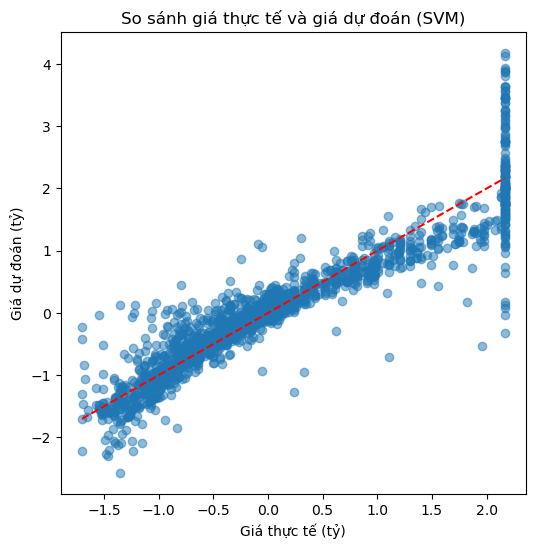

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# D·ª± ƒëo√°n
y_pred = model.predict(X_test)

# V·∫Ω scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ƒë∆∞·ªùng y = x
plt.xlabel("Gi√° th·ª±c t·∫ø (t·ª∑)")
plt.ylabel("Gi√° d·ª± ƒëo√°n (t·ª∑)")
plt.title("So s√°nh gi√° th·ª±c t·∫ø v√† gi√° d·ª± ƒëo√°n (SVM)")
plt.show()


In [12]:
# 7. GridSearchCV cho SVR
param_grid = {
    'C': [1, 10, 50, 100, 200],
    'gamma': ['scale', 0.1, 0.05, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(
    SVR(),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=1
)

grid.fit(X_train, y_train)

print("‚úÖ T√¨m th·∫•y b·ªô tham s·ªë t·ªët nh·∫•t:")
print(grid.best_params_)

# 8. ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nüîπ R¬≤ tr√™n t·∫≠p test: {r2:.3f}")
print(f"üîπ MAE: {mae:.3f}")
print(f"üîπ RMSE: {rmse:.3f}")


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.6s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   4.1s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   4.3s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   4.4s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  11.6s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  11.6s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  11.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END .........................C=1, gamma=0.

In [ ]:
# b√¢y gi·ªù anh c√≥ 2 csv --> export t·ª´ postgreSQL , export t·ª´ oracle database --> tool compare xem 2 csv gi·ªëng nhau hay ko 